**Data Collection :** 

In [1]:
import cv2
import os.path as path
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
projet_path = "/content/drive/MyDrive/faces_set/"

In [5]:
cd {projet_path}

/content/drive/MyDrive/faces_set


**Face detection**  : Cascade classifier





In [ ]:
imgPath = [ ]
#+str(j+1)+'/'
for j in range(113): 
  i = str(j+1)
  for f in os.listdir(projet_path+i):
    
   objectPaths = os.path.join(projet_path+str(j+1)+'/' ,f) 
   #print(f)
   print(objectPaths)
   imgPath.append(objectPaths)



/content/drive/MyDrive/faces_set/1/Sujet1-1.jpg
/content/drive/MyDrive/faces_set/1/Sujet1-2.jpg
/content/drive/MyDrive/faces_set/1/Sujet1-3.jpg
/content/drive/MyDrive/faces_set/1/Sujet1-4.jpg
/content/drive/MyDrive/faces_set/1/Sujet1-5.jpg
/content/drive/MyDrive/faces_set/2/Sujet2-1.jpg
/content/drive/MyDrive/faces_set/2/Sujet2-2.jpg
/content/drive/MyDrive/faces_set/2/Sujet2-3.jpg
/content/drive/MyDrive/faces_set/2/Sujet2-4.jpg
/content/drive/MyDrive/faces_set/2/Sujet2-5.jpg
/content/drive/MyDrive/faces_set/3/Sujet3-1.jpg
/content/drive/MyDrive/faces_set/3/Sujet3-2.jpg
/content/drive/MyDrive/faces_set/3/Sujet3-3.jpg
/content/drive/MyDrive/faces_set/3/Sujet3-4.jpg
/content/drive/MyDrive/faces_set/3/Sujet3-5.jpg
/content/drive/MyDrive/faces_set/4/Sujet4-1.jpg
/content/drive/MyDrive/faces_set/4/Sujet4-2.jpg
/content/drive/MyDrive/faces_set/4/Sujet4-3.jpg
/content/drive/MyDrive/faces_set/4/Sujet4-4.jpg
/content/drive/MyDrive/faces_set/4/Sujet4-5.jpg
/content/drive/MyDrive/faces_set/5/Sujet

In [ ]:
#imgPath

Upload the file  :  haarcascade_frontalface_default.xml

In [ ]:
face_cascade = cv2.CascadeClassifier("/content/haarcascade_frontalface_default.xml") 
f = open("/content/faces.txt", "w")

for path in imgPath :
  img = cv2.imread(path)
  gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray,1.2,5,minSize=(500, 500)) 
  for face in faces:
    print(str(face)+"  "+path+"\n")
    f.write(str(face)+"  "+path+"\n")
f.close()

[1581  401 1467 1467]  /content/drive/MyDrive/faces_set/1/Sujet1-1.jpg

[1593  429 1433 1433]  /content/drive/MyDrive/faces_set/1/Sujet1-2.jpg

[1629  450 1411 1411]  /content/drive/MyDrive/faces_set/1/Sujet1-3.jpg

[1630  400 1466 1466]  /content/drive/MyDrive/faces_set/1/Sujet1-4.jpg

[1468  419 1593 1593]  /content/drive/MyDrive/faces_set/1/Sujet1-5.jpg

[1537  722 1541 1541]  /content/drive/MyDrive/faces_set/2/Sujet2-1.jpg

[1615  735 1419 1419]  /content/drive/MyDrive/faces_set/2/Sujet2-2.jpg

[1527  663 1616 1616]  /content/drive/MyDrive/faces_set/2/Sujet2-3.jpg

[1555  695 1625 1625]  /content/drive/MyDrive/faces_set/2/Sujet2-4.jpg

[1428  719 1657 1657]  /content/drive/MyDrive/faces_set/2/Sujet2-5.jpg

[1501  526 1549 1549]  /content/drive/MyDrive/faces_set/3/Sujet3-1.jpg

[1490  511 1543 1543]  /content/drive/MyDrive/faces_set/3/Sujet3-2.jpg

[1520  536 1451 1451]  /content/drive/MyDrive/faces_set/3/Sujet3-3.jpg

[1504  494 1479 1479]  /content/drive/MyDrive/faces_set/3/Sujet3

**Cascade clasifier example case:**

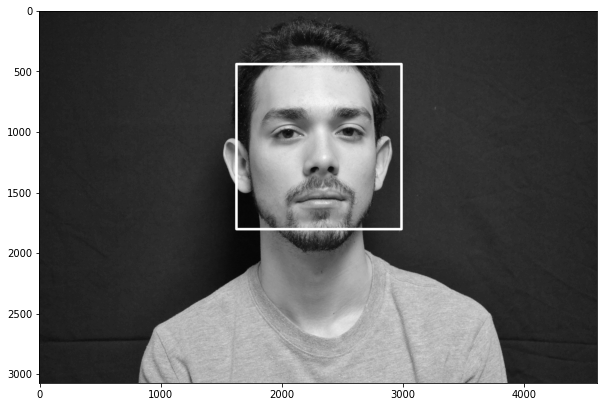

In [38]:
face_cascade = cv2.CascadeClassifier("/content/drive/MyDrive/Driss Med. Ahmed   Barhoumi Med.Aymen/detection/haarcascade_frontalface_default.xml") 
img = cv2.imread("/content/drive/MyDrive/faces_set/1/Sujet1-1.jpg",0)
faces = face_cascade.detectMultiScale(img, 1.3, 5,minSize=(500, 500))
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,255),20)
    plt.figure(figsize=(10,8))
    plt.imshow(img, cmap='gray')
    plt.show()
    


**Face detection** : Histogram of Oriented Gradients (HOG) in Dlib

---



---



---



In [21]:
import dlib
from imutils import face_utils
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
f = open("/content/faces2.txt", "w")

for path in imgPath :
  
  gray =cv2.imread(path,0)

  im = np.float32(gray) / 255.0
  gx = cv2.Sobel(im, cv2.CV_32F, 1, 0, ksize=1)
  gy = cv2.Sobel(im, cv2.CV_32F, 0, 1, ksize=1)
  mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)

  face_detect = dlib.get_frontal_face_detector()
  rects = face_detect(gray, 1)
  for (i, rect) in enumerate(rects):
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    print(x,y,w, h," ",path)
    f.write("["+str(x)+"  "+str(y)+"  "+str(w)+"  "+str(h)+"]"+"  "+path+"\n")
    
f.close()




1763 741 1150 1150   /content/drive/MyDrive/faces_set/1/Sujet1-1.jpg
1763 741 1150 1150   /content/drive/MyDrive/faces_set/1/Sujet1-2.jpg
1763 741 1150 1150   /content/drive/MyDrive/faces_set/1/Sujet1-3.jpg
1635 741 1150 1150   /content/drive/MyDrive/faces_set/1/Sujet1-5.jpg
1656 1043 1380 1380   /content/drive/MyDrive/faces_set/2/Sujet2-1.jpg
1656 890 1380 1380   /content/drive/MyDrive/faces_set/2/Sujet2-2.jpg
1656 890 1380 1380   /content/drive/MyDrive/faces_set/2/Sujet2-3.jpg
1656 1043 1380 1380   /content/drive/MyDrive/faces_set/2/Sujet2-4.jpg
1436 884 1656 1656   /content/drive/MyDrive/faces_set/2/Sujet2-5.jpg
1788 830 959 959   /content/drive/MyDrive/faces_set/3/Sujet3-1.jpg
1635 741 1150 1150   /content/drive/MyDrive/faces_set/3/Sujet3-2.jpg
1635 741 1150 1150   /content/drive/MyDrive/faces_set/3/Sujet3-3.jpg
1635 741 1150 1150   /content/drive/MyDrive/faces_set/3/Sujet3-4.jpg
1656 736 1380 1381   /content/drive/MyDrive/faces_set/3/Sujet3-5.jpg
1763 741 1150 1150   /content/driv

**HOG example case :**

x= 1763 y= 741 width= 1150 height= 1150


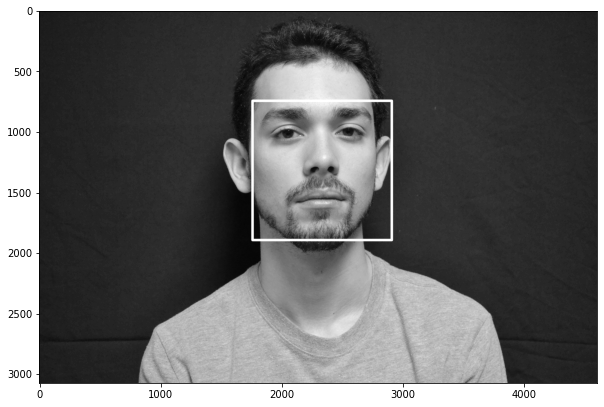

In [39]:
face_detect = dlib.get_frontal_face_detector()
image = cv2.imread("/content/drive/MyDrive/faces_set/1/Sujet1-1.jpg",0)


rects = face_detect(image, 1)
for (i, rect) in enumerate(rects):
  (x, y, w, h) = face_utils.rect_to_bb(rect)
  print("x=",x,"y=",y,"width=",w,"height=", h)
  cv2.rectangle(image, (x, y), (x + w, y + h), (255, 255, 255), 20)
#cv2.imshow("Image", image)    
plt.figure(figsize=(10,8))
plt.imshow(image, cmap='gray')
plt.show()



  
